In [1]:
# Initialisation cell
import netCDF4           as nc
import scipy             as sp
import numpy             as np
import scipy.optimize    as op
import scipy.interpolate as ip
import scipy.stats       as st
import matplotlib.pyplot as plt
import matplotlib        as mpl
import matplotlib.animation as ani
import math
import sys
import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable
warnings.filterwarnings('ignore')

fontsize=18

plt.rcParams.update({'font.size': fontsize})
plt.rcParams.update({'font.size': fontsize})

# Font for use in annotations
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

fpath = "/home/harrison/Documents/uni/Year 4/Computational Physics And Modelling/w6_project/doc/"

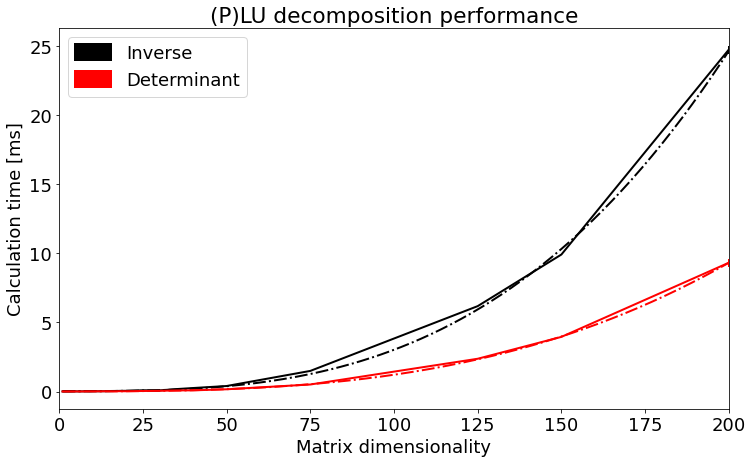

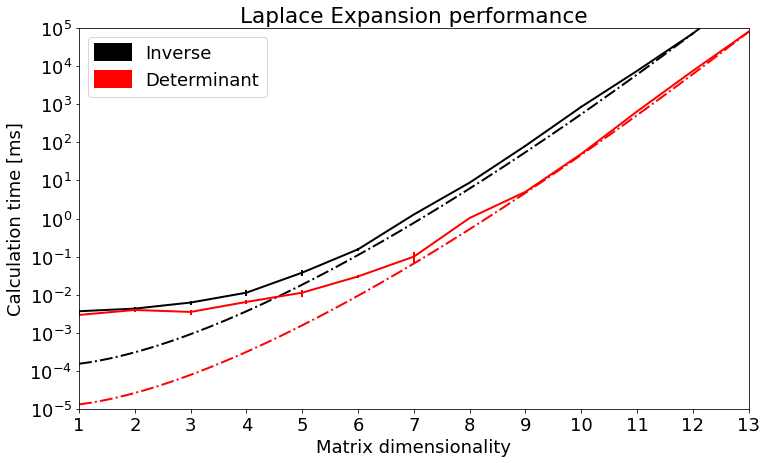

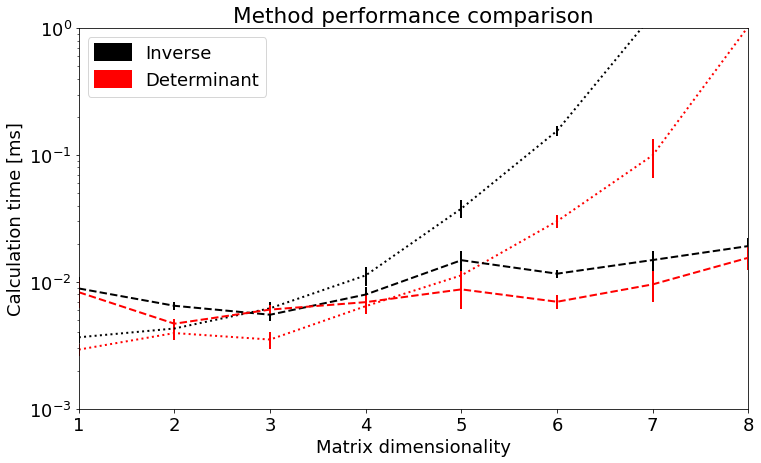

Done!


In [48]:
# parse data, initially stored in spreadsheet -----------------------
data    = np.loadtxt(fpath + "data.txt").T
x       = data[0][::2]

det_lu  = data[1][1::2]
det_luE = data[2][1::2]
inv_lu  = data[3][1::2]
inv_luE = data[4][1::2]

xLU_im  = np.where(inv_lu == 0)
xLU_i   = np.delete(x,xLU_im)
xLU_dm  = np.where(inv_lu == 0)
xLU_d   = np.delete(x,xLU_dm)
xLU_p   = np.linspace(1,max(xLU_i[-1],xLU_d[-1]),200)

det_lu  = np.delete(det_lu,xLU_dm)
det_luE = np.delete(det_luE,xLU_dm)
inv_lu  = np.delete(inv_lu,xLU_im)
inv_luE = np.delete(inv_luE,xLU_im)

det_bf  = data[1][::2]
det_bfE = data[2][::2]
inv_bf  = data[3][::2]
inv_bfE = data[4][::2]

xBF_im   = np.where(inv_bf == 0)
xBF_i    = np.delete(x,xBF_im)
xBF_dm   = np.where(det_bf == 0)
xBF_d    = np.delete(x,xBF_dm)
xBF_p   = np.linspace(1,max(xBF_i[-1],xBF_d[-1]),200)

det_bf  = np.delete(det_bf, xBF_dm)
det_bfE = np.delete(det_bfE,xBF_dm)
inv_bf  = np.delete(inv_bf, xBF_im)
inv_bfE = np.delete(inv_bfE,xBF_im)

# fit curves to data --------------------------------------
def fit_fac(x,A,x0,c):
    x0 = 0
    c=0
    return ( A*sp.special.factorial(x-x0) + c )

def fit_n3(x,A,x0,c):
    return ( A*(x-x0)**3 + c)

f = fit_n3
popt,pcov = op.curve_fit(f,xLU_d,det_lu)
det_luF   = [ f(i,popt[0],popt[1],popt[2]) for i in xLU_p]

popt,pcov = op.curve_fit(f,xLU_i,inv_lu)
inv_luF   = [ f(i,popt[0],popt[1],popt[2]) for i in xLU_p]

f = fit_fac
popt,pcov = op.curve_fit(f,xBF_d,det_bf)
det_bfF   = [ f(i,popt[0],popt[1],popt[2]) for i in xBF_p]

popt,pcov = op.curve_fit(f,xBF_i,inv_bf)
inv_bfF   = [ f(i,popt[0],popt[1],popt[2]) for i in xBF_p]

# plot PLU graph ------------------------------------
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

ax.errorbar(xLU_i,inv_lu,yerr = det_luE,color='black',lw=2,linestyle="solid", label="Inverse")
ax.errorbar(xLU_d,det_lu,yerr = det_luE,color='red',  lw=2,linestyle="solid", label="Determinant")

ax.plot(xLU_p,inv_luF,color='black',lw=2,linestyle="dashdot")
ax.plot(xLU_p,det_luF,color='red',  lw=2,linestyle="dashdot")

leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(38)

ax.set_title("(P)LU decomposition performance")
ax.set_ylabel("Calculation time [ms]")
ax.set_xlim(1,xLU_p[-1])
ax.set_xticks(np.arange(0,xLU_p[-1]+25,25))
ax.set_xlabel("Matrix dimensionality")

plt.savefig(fpath + "img/lu.jpg",dpi=200,bbox_inches='tight')
plt.show()


# plot laplace expansion graph ---------------------------------------
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

ax.errorbar(xBF_i,inv_bf,yerr = inv_bfE,color='black',lw=2,linestyle="solid",label="Inverse")
ax.errorbar(xBF_d,det_bf,yerr = det_bfE,color='red',  lw=2,linestyle="solid",label="Determinant")

ax.plot(xBF_p,inv_bfF,color='black',lw=2,linestyle="dashdot")
ax.plot(xBF_p,det_bfF,color='red',  lw=2,linestyle="dashdot")

leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(38)

ax.set_title("Laplace Expansion performance")
ax.set_xticks(np.arange(1,xBF_p[-1]+1,1))
ax.set_xlim(1,max(xBF_d[-1],xBF_i[-1]))
ax.set_xlabel("Matrix dimensionality")
ax.set_yscale("log")
ax.set_ylabel("Calculation time [ms]")
ax.set_ylim(min(inv_bfF[0],det_bfF[0]),max(inv_bf[-1],det_bf[-1]))
ax.set_yticks([1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5])

plt.savefig(fpath + "img/bf.jpg",dpi=200,bbox_inches='tight')
plt.show()


# plot comparison at small x ---------------------------------------
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

ax.errorbar(xBF_i,inv_bf,yerr = inv_bfE,color='black',lw=2,linestyle="dotted",label="Inverse")
ax.errorbar(xBF_d,det_bf,yerr = det_bfE,color='red',  lw=2,linestyle="dotted",label="Determinant")

ax.errorbar(xLU_i,inv_lu,yerr = det_luE,color='black',lw=2,linestyle="dashed")
ax.errorbar(xLU_d,det_lu,yerr = det_luE,color='red',  lw=2,linestyle="dashed")

leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(38)

ax.set_title("Method performance comparison")
ax.set_yscale("log")
ax.set_ylim(1e-3,1e0)
ax.set_ylabel("Calculation time [ms]")
ax.set_xlim(1,8)
ax.set_xlabel("Matrix dimensionality")

plt.savefig(fpath + "img/compare.jpg",dpi=200,bbox_inches='tight')
plt.show()


# Done
print("Done!")
